<a href="https://colab.research.google.com/github/Kashishkasalwal/Big-Data-Analysis_Stock-Prediction-using-LSTM/blob/main/BDA_StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
### Keras and Tensorflow >2.0
### Data Collection
import pandas_datareader as pdr
key=""

In [104]:
df = pdr.get_data_tiingo('AAPL', api_key="5dce68a8b5101c848814f1cd6598a205efce6654")

In [105]:
df.to_csv('AAPL.csv')

In [106]:
import pandas as pd

In [107]:
df=pd.read_csv('AAPL.csv')

In [108]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-13 00:00:00+00:00,134.43,134.66,131.930,132.44,91266545,134.43,134.66,131.930,132.44,91266545,0.0,1.0
1253,AAPL,2021-04-14 00:00:00+00:00,132.03,135.00,131.655,134.94,87222782,132.03,135.00,131.655,134.94,87222782,0.0,1.0
1254,AAPL,2021-04-15 00:00:00+00:00,134.50,135.00,133.640,133.82,89347102,134.50,135.00,133.640,133.82,89347102,0.0,1.0
1255,AAPL,2021-04-16 00:00:00+00:00,134.16,134.67,133.280,134.30,84922386,134.16,134.67,133.280,134.30,84922386,0.0,1.0
1256,AAPL,2021-04-19 00:00:00+00:00,134.84,135.47,133.340,133.51,94264215,134.84,135.47,133.340,133.51,94264215,0.0,1.0


In [109]:
df1=df.reset_index()['close']

In [110]:
df1.shape

(1257,)

In [111]:
df1

0       105.97
1       105.68
2       105.08
3       104.35
4        97.82
         ...  
1252    134.43
1253    132.03
1254    134.50
1255    134.16
1256    134.84
Name: close, Length: 1257, dtype: float64

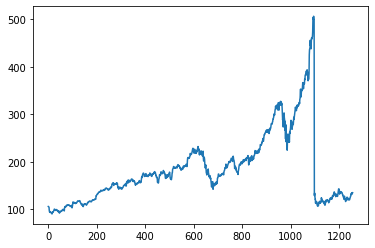

In [112]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [113]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np

In [114]:
df1

0       105.97
1       105.68
2       105.08
3       104.35
4        97.82
         ...  
1252    134.43
1253    132.03
1254    134.50
1255    134.16
1256    134.84
Name: close, Length: 1257, dtype: float64

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [116]:
df1

array([[0.03759471],
       [0.03689717],
       [0.035454  ],
       ...,
       [0.10621768],
       [0.10539988],
       [0.10703548]])

In [117]:
print(df1)

[[0.03759471]
 [0.03689717]
 [0.035454  ]
 ...
 [0.10621768]
 [0.10539988]
 [0.10703548]]


In [118]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [119]:
training_size,test_size

(817, 440)

In [120]:
train_data

array([[0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.01200241],
       [0.01144919],
       [0.01339747],
       [0.01253157],
       [0.01385448],
       [0.00736019],
       [0.004089  ],
       [0.007

In [121]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [122]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [123]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [124]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [125]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [126]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [127]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [128]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 272ms/step - loss: 0.0159 - val_loss: 0.0500
Epoch 2/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0032 - val_loss: 0.0257
Epoch 3/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0012 - val_loss: 0.0239
Epoch 4/100
12/12 [==============================] - 2s 193ms/step - loss: 7.8644e-04 - val_loss: 0.0212
Epoch 5/100
12/12 [==============================] - 2s 206ms/step - loss: 5.1297e-04 - val_loss: 0.0198
Epoch 6/100
12/12 [==============================] - 2s 200ms/step - loss: 4.4238e-04 - val_loss: 0.0195
Epoch 7/100
12/12 [==============================] - 2s 200ms/step - loss: 3.9908e-04 - val_loss: 0.0189
Epoch 8/100
12/12 [==============================] - 2s 200ms/step - loss: 3.6764e-04 - val_loss: 0.0186
Epoch 9/100
12/12 [==============================] - 2s 201ms/step - loss: 3.5402e-04 - val_loss: 0.0182
Epoch 10/100
12/12 [==============================] - 2s 201ms/step

In [131]:
import tensorflow as tf

In [132]:
tf.__version__

'2.4.1'

In [133]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [134]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [135]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.52490425077403

In [136]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

273.31598666027304

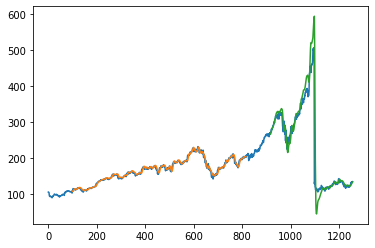

In [137]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [138]:
len(test_data)

440

In [139]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [140]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [141]:
temp_input

[0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.10010823812387254,
 0.10535177390258

In [143]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10652394]
100
[0.10652394]
101
2 day input [0.06179194 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377
 0.07562237 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365
 0.09991581 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155
 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673 0.10032471
 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438
 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168
 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897
 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028
 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596
 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585
 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532
 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575 0.0713169
 0.07949489 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431
 0.07110042 0.07651

In [144]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [145]:
import matplotlib.pyplot as plt

In [146]:
len(df1)

1257

In [147]:
df3=df1.tolist()
df3.extend(lst_output)

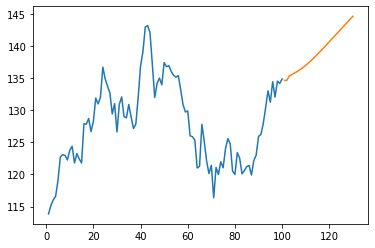

In [150]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

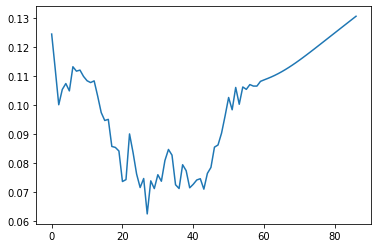

In [151]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [153]:
df3=scaler.inverse_transform(df3).tolist()

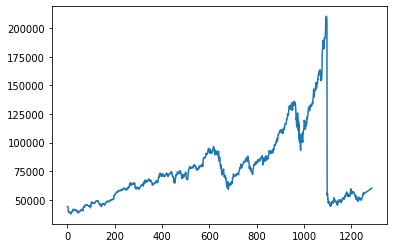

In [154]:
plt.plot(df3)

In [155]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=False)

alt.Chart(...)